# Mandelbrot Set
### Fc(z) = z^2 + c
Happening in the world of complex numbers. Two axes x+yi. i where i^2 = -1.

The magnitude of the complex number |a+yi|

Take complex number c. fc(z) = z^2 + c.
The bahvior of fc when starting with z=0. when c = 1
1. a = fc(0) = 1
2. b = fc(a) = 2
3. c = fc(b) = 5
4. d = fc(c) = 26
5. e = fc(d) = ...

What happens to the magnitude of these numbers? there are 2 options
1. The distance from 0 becomes arbitrarily large -> goes to infinity. for example when c = 1
2. The distance is bounded. It never gets larger than 2. for example if c = -1

When case 2 occurs, c is part of the mandelbrot set!

For the famous mandelbrot image. We give it a shade based on how fast the number goes to inifinity. and keep it black if it stays smaller than 2!

* obviously we cannot consider guys that have magnitude larger than 2

In [27]:
# Import libraries for simulation
import tensorflow as tf
import numpy as np

# Imports for visualization
import PIL.Image
from io import BytesIO
from IPython.display import Image, display

In [28]:
# display the image as jpeg once iterations counts
def DisplayFractal(a, fmt='jpeg'):
    a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
    img = np.concatenate([10+20*np.cos(a_cyclic),
                        30+50*np.sin(a_cyclic),
                        155-80*np.cos(a_cyclic)], 2)
    img[a==a.max()] = 0
    a = img
    a = np.uint8(np.clip(a, 0, 255))
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))

In [29]:
# Use interactive tensorflow session
sess = tf.InteractiveSession()

In [30]:
# we can mix np and tf. use numpy to create 2d array of complex numbers
Y,X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005]
Z = X+1j*Y

In [31]:
# Y is from -1.3 to 1.3 in steps of 0.05
# X is from -2 to 1 in steps of 0.05
# Z is X + jY

In [38]:
# tf.constant(value, dtype=None, shape=None, name='Const')
# Pass in - Tensor values, shape ie [2,3], name for reference
# Return - Contant Tensor

# Z is the results, of the mandelbrot iteration
# contant creates a tensor of size Z
xs = tf.constant(Z.astype(np.complex64))

In [39]:
# tf.Variable(a tensor, name)
# Pass in - Tensor and a name (optional)
# Return - Variable

# this is used to ass a variable to the graph
zs = tf.Variable(xs)

In [40]:
# creates zeroes of the same size and shape as xs as float32
ns = tf.Variable(tf.zeros_like(xs, tf.float32))

In [41]:
# the value of the tensor and its shape
xs.eval(), xs.shape

(array([[-2.00000000-1.29999995j, -1.99500000-1.29999995j,
         -1.99000001-1.29999995j, ...,  0.98500001-1.29999995j,
          0.99000001-1.29999995j,  0.99500000-1.29999995j],
        [-2.00000000-1.29499996j, -1.99500000-1.29499996j,
         -1.99000001-1.29499996j, ...,  0.98500001-1.29499996j,
          0.99000001-1.29499996j,  0.99500000-1.29499996j],
        [-2.00000000-1.28999996j, -1.99500000-1.28999996j,
         -1.99000001-1.28999996j, ...,  0.98500001-1.28999996j,
          0.99000001-1.28999996j,  0.99500000-1.28999996j],
        ..., 
        [-2.00000000+1.28499997j, -1.99500000+1.28499997j,
         -1.99000001+1.28499997j, ...,  0.98500001+1.28499997j,
          0.99000001+1.28499997j,  0.99500000+1.28499997j],
        [-2.00000000+1.28999996j, -1.99500000+1.28999996j,
         -1.99000001+1.28999996j, ...,  0.98500001+1.28999996j,
          0.99000001+1.28999996j,  0.99500000+1.28999996j],
        [-2.00000000+1.29499996j, -1.99500000+1.29499996j,
         -1.

In [42]:
# Explicit initialization of variables (needed before running them)

In [43]:
tf.global_variables_initializer().run()

In [65]:
# Compute the new values of z: z^2 + x
zs_ = zs*zs + xs

In [66]:
# has the value diverged from 4, ie will it tend towards infinity?

# tf.abs just give absolite value to all the tensor values
not_diverged = tf.abs(zs_) < 1

In [71]:
not_diverged.eval()

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)

In [67]:
# each step we perform an iteration of the mandelbrot equation

# zs.assign transfers the value of the tensors over

# tf.cast changes the values to a float
step = tf.group(zs.assign(zs_), ns.assign_add(tf.cast(not_diverged, tf.float32)))

In [68]:
for i in range(200):
    step.run()

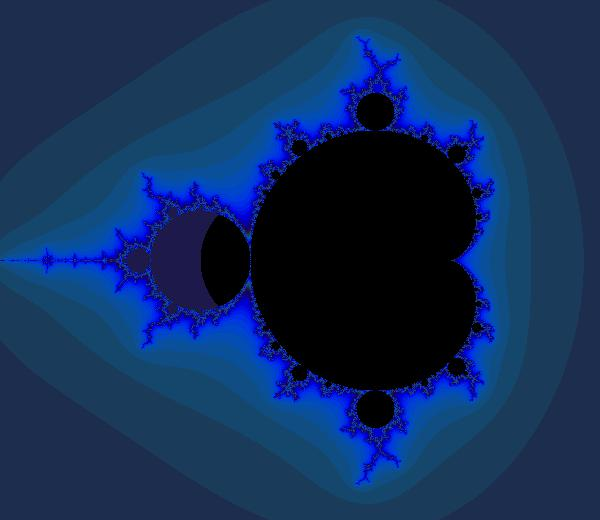

In [69]:
DisplayFractal(ns.eval())